EKF Localization
Credit to cyrill stachniss's Online course

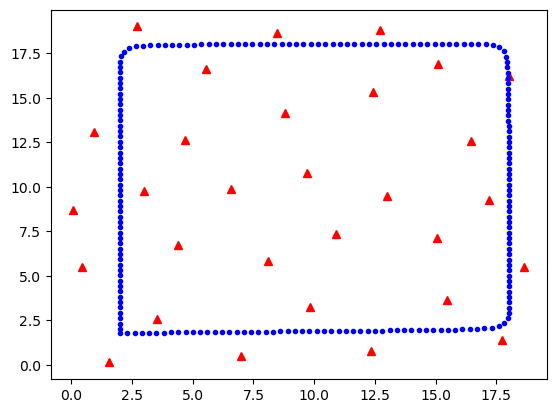

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import ex6 as ex
%matplotlib inline

# read dataset
data = pickle.load(open("dataset_2d_landmarks.p", "rb"))

# get landmark coordinates 
M = data['M']

# get ground truth trajectory
gt_traj = data['gt']

# show map
plt.figure(1)
plt.plot(M[:,0], M[:,1], '^r')


# show ground truth trajectory
for i in range(0,len(gt_traj),10):
    plt.plot(gt_traj[i][0],gt_traj[i][1], '.b')


Initialization

In [2]:
# 3x3 process noise
sigma_x = 0.25  # [m]
sigma_y = 0.25  # [m]
sigma_theta = np.deg2rad(10)  # [rad]
R = np.diag(np.array([sigma_x, sigma_y, sigma_theta])**2)

# 2x2 observation noise
sigma_r = 0.1  # [m]
sigma_phi = np.deg2rad(5)  # [rad]
Q = np.diag(np.array([sigma_r, sigma_phi])**2)

# initial state
mu = np.array([2, 2, np.pi/2])
S = np.array([[1, 0, 0],[0, 1, 0], [0, 0, np.pi/3]])

Localization with only odometry

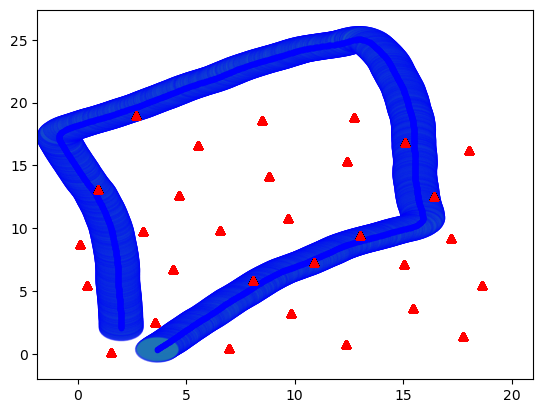

In [3]:
mu = np.array([2, 2, np.pi/2])
S = np.array([[1, 0, 0],[0, 1, 0], [0, 0, np.pi/3]])
R = np.zeros((3,3))
for i in range(1,len(data['odom'])):
    u_t = [data['odom'][i-1], data['odom'][i]]
    z = data['z'][i]

    mu, sigma_bar = ex.ekf_predict(mu.reshape(3,1), S, u_t, R)
    ex.plot_state(mu, sigma_bar, M)

Localization with only sensor measurement. We can see that the estimated robot's trajectory is very noisy.

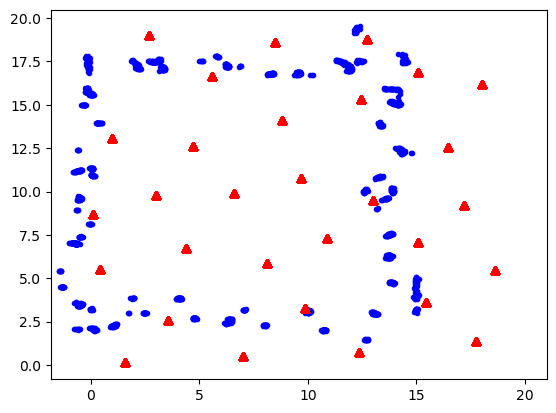

In [4]:
mu = np.array([2, 2, np.pi/2])
S = np.array([[1, 0, 0],[0, 1, 0], [0, 0, np.pi/3]])
R = np.diag(np.array([sigma_x, sigma_y, sigma_theta])**2)
sigma_r = 0.1
sigma_phi = np.deg2rad(5)
Q = np.diag(np.array([sigma_r, sigma_phi])**2)
for i in range(1,len(data['odom'])):
    z = data['z'][i]
    mu=np.reshape(mu,(3,1))
    mu = ex.ekf_predict_z(z, Q, M)
    ex.plot_state_2(mu, S, M)

Extended Kalman Filtering localization by combining both odometry and sensor measurement !

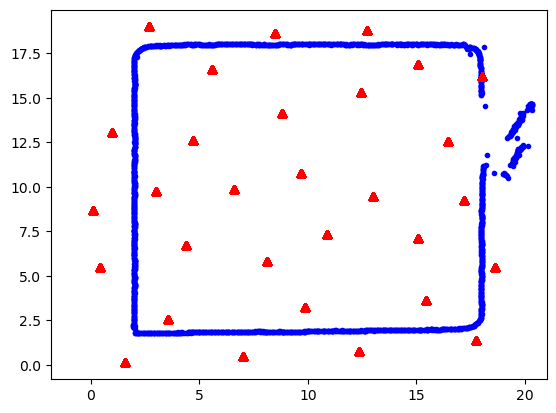

In [5]:
# 3x3 process noise
sigma_x = 0.25
sigma_y = 0.25
sigma_theta = np.deg2rad(10)
R = np.diag(np.array([sigma_x, sigma_y, sigma_theta])**2) #Noise in odometry

# 2x2 observation noise
sigma_r = 0.1
sigma_phi = np.deg2rad(5)
Q = np.diag(np.array([sigma_r, sigma_phi])**2)

# initial state
mu = np.array([2, 2, np.pi/2])
S = np.array([[1, 0, 0],[0, 1, 0], [0, 0, np.pi/3]])
for i in range(1,len(data['odom'])):
    u_t = [data['odom'][i-1], data['odom'][i]]
    z = data['z'][i]

    mu_bar, sigma_bar = ex.ekf_predict(mu.reshape(3,1), S, u_t, R)
    mu, S = ex.ekf_correct(mu_bar, sigma_bar, z, Q, M)
    ex.plot_state(mu, S, M)

If we trust our measurement more and reduce the sigma parameters, then we can see that our results improve! In particular, we can find that the measurement of radius is very precise. Therefore, it is important to tune the parameters for process noise and observation noise if we want to apply the extended Kalman filter.

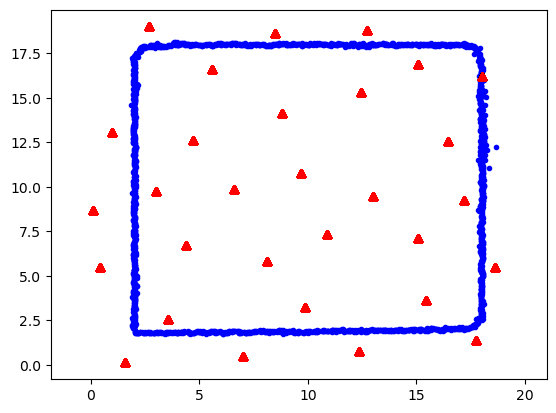

In [9]:
# 3x3 process noise
sigma_x = 0.25
sigma_y = 0.25
sigma_theta = np.deg2rad(10)
R = np.diag(np.array([sigma_x, sigma_y, sigma_theta])**2) #Noise in odometry

# Reduce the 2x2 observation noise
sigma_r = 0.01
sigma_phi = np.deg2rad(5)
Q = np.diag(np.array([sigma_r, sigma_phi])**2)

# initial state
mu = np.array([2, 2, np.pi/2])
S = np.array([[1, 0, 0],[0, 1, 0], [0, 0, np.pi/3]])
for i in range(1,len(data['odom'])):
    u_t = [data['odom'][i-1], data['odom'][i]]
    z = data['z'][i]

    mu_bar, sigma_bar = ex.ekf_predict(mu.reshape(3,1), S, u_t, R)
    mu, S = ex.ekf_correct(mu_bar, sigma_bar, z, Q, M)
    ex.plot_state(mu, S, M)